In [4]:
import pandas as pd

WORKSPACE = '/Users/houtonglei/OneDrive - stu.hqu.edu.cn/数学建模/2021美赛/'
DATASET_DESCRIPTION = WORKSPACE + '2021_ICM_ProblemC/2021MCM_ProblemC_DataSet.xlsx'
dataset_description = pd.read_excel(DATASET_DESCRIPTION)

In [5]:
sum_train = pd.read_csv('result/sum_train.csv',index_col=0)
X = sum_train[['tl_pos', 'svm_pos', 'mlp_pos', 'nc_pos']]
Y = sum_train['Lab Status']
X = X.dropna(axis=0,how='any')
Y = Y.dropna(axis=0,how='any')

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import learning_curve
clf = LogisticRegressionCV()
train_sizes,train_scores,test_scores,fit_times,score_times = learning_curve(clf,X, Y, n_jobs=12, return_times=True)
clf.fit(X,Y)

LogisticRegressionCV()

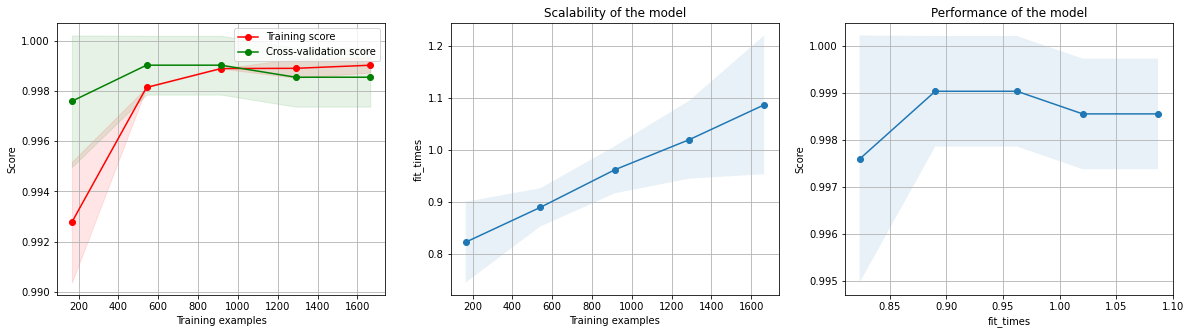

In [6]:
import matplotlib.pyplot as plt
import numpy as np
_, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")

plt.show()
_.savefig('sum.svg',dpi=600)

In [7]:
sum_test = pd.read_csv('result/sum_test.csv',index_col=0)
X = sum_test[['tl_pos', 'svm_pos', 'mlp_pos', 'nc_pos']]
X = X.fillna(0)
pred = clf.predict_proba(X)

t = pd.DataFrame(pred,index=sum_test.index)
t.to_csv('result/result.csv', float_format='%.16f')


